# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should look like this with a cluster column at the last.                                                                                      


                                           

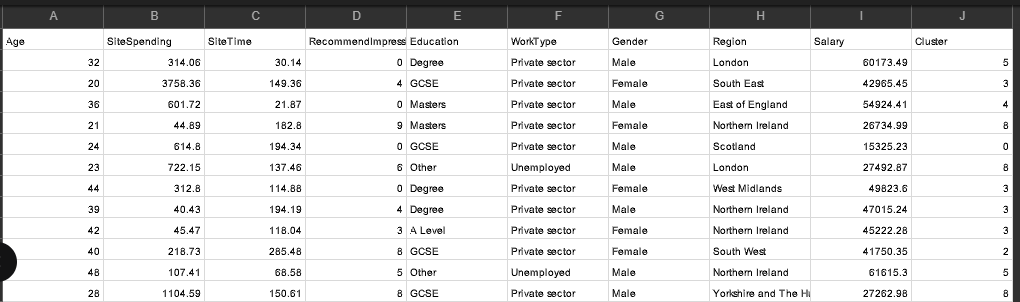

## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1 and extract predicted clusters out of it.

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
def load_dataset():

    df = pd.read_excel('Dataset.xlsx')
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    # TODO: Convert categorical features to numeric using one-hot or label encoding
    # TOFO: Apply scaling if needed using StandardScaler
    # TODO: Normalize numerical columns if needed
    # TODO: Drop irrelevant columns if needed

    processed_df = df.copy()

    # Convert categorical features to numeric using LabelEncoder
    categorical_cols = ['Education', 'WorkType', 'Gender', 'Region']
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        processed_df[col] = le.fit_transform(processed_df[col])
        label_encoders[col] = le

    # Apply scaling and normalize numerical columns using StandardScaler
    numerical_cols = ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']
    scaler = StandardScaler()
    processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])


    # print(processed_df.head())

    return processed_df


In [20]:

preprocess_data(load_dataset())

        Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0 -0.652693     -0.606337 -1.409589            -1.302409          1         0   
1 -1.565871      2.783826 -0.020074            -0.212299          2         0   
2 -0.348301     -0.323198 -1.505977            -1.302409          3         0   
3 -1.489773     -0.871276  0.369671             1.150339          3         0   
4 -1.261478     -0.310324  0.504171            -1.302409          2         0   

   Gender  Region    Salary  
0       1       2  0.591112  
1       0       7 -0.170847  
2       1       1  0.358686  
3       0       5 -0.889520  
4       1       6 -1.394736  


,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Gender,Region,Salary
0,-0.652693,-0.606337,-1.409589,-1.302409,1,0,1,2,0.591112
1,-1.565871,2.783826,-0.020074,-0.212299,2,0,0,7,-0.170847
2,-0.348301,-0.323198,-1.505977,-1.302409,3,0,1,1,0.358686
3,-1.489773,-0.871276,0.369671,1.150339,3,0,0,5,-0.889520
4,-1.261478,-0.310324,0.504171,-1.302409,2,0,1,6,-1.394736
...,...,...,...,...,...,...,...,...,...
995,1.173661,-0.740583,1.419442,0.060229,2,1,0,4,-1.085595
996,1.021465,-0.762483,0.933426,0.060229,4,0,1,9,-0.846570
997,-1.413675,1.423292,1.585876,1.695394,4,0,1,7,0.696027
998,0.640974,3.371128,-1.437095,-1.302409,1,0,1,5,2.210508


In [7]:
def kmeans_from_scratch(X, k, max_iters=100):


  # Return:
  # - labels: 1D numpy array of cluster assignments
  # - centroids: final centroid coordinates
  X = X.select_dtypes(include=[np.number]).values
  n_samples, n_features = X.shape

  random_idx = np.random.choice(n_samples, k, replace=False)
  centroids = X[random_idx]

  for _ in range(max_iters):
      distances = np.zeros((n_samples, k))
      for i in range(n_samples):
          for j in range(k):
              distances[i][j] = np.sqrt(np.sum((X[i] - centroids[j]) ** 2))
      labels = np.argmin(distances, axis=1)

      new_centroids = np.zeros((k, n_features))
      for i in range(k):
          cluster_points = X[labels == i]
          if len(cluster_points) > 0:
              new_centroids[i] = cluster_points.mean(axis=0)

      if np.all(centroids == new_centroids):
          break
      centroids = new_centroids

  return labels, centroids

In [ ]:
def visualize_clusters(X, labels, title):

  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(X.select_dtypes(include=[np.number]))

  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
  plt.colorbar(scatter)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(title)
  plt.show()

        Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0 -0.652693     -0.606337 -1.409589            -1.302409          1         0   
1 -1.565871      2.783826 -0.020074            -0.212299          2         0   
2 -0.348301     -0.323198 -1.505977            -1.302409          3         0   
3 -1.489773     -0.871276  0.369671             1.150339          3         0   
4 -1.261478     -0.310324  0.504171            -1.302409          2         0   

   Gender  Region    Salary  
0       1       2  0.591112  
1       0       7 -0.170847  
2       1       1  0.358686  
3       0       5 -0.889520  
4       1       6 -1.394736  
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21   

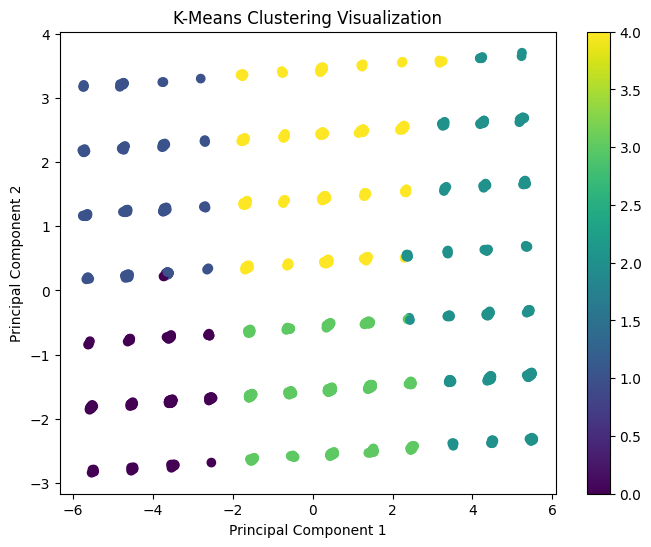

In [16]:
k = 5
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
labels, centroids = kmeans_from_scratch(df_processed, k)
df['Cluster'] = labels
print(df.head())

visualize_clusters(df_processed, labels, "K-Means Clustering Visualization")

## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
df = load_dataset()
df_processed = preprocess_data(df)

# TODO:
# 1. Apply KMeans from sklearn using same k and maximum iterations
# 2. Get predicted labels

kmeans = KMeans(n_clusters=k, max_iter=max_iter, init='random', random_state=42)
labels_sklearn = kmeans.fit_predict(df_processed.select_dtypes(include=[np.number]))
df['Cluster'] = labels_sklearn
print(df.head())

        Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0 -0.652693     -0.606337 -1.409589            -1.302409          1         0   
1 -1.565871      2.783826 -0.020074            -0.212299          2         0   
2 -0.348301     -0.323198 -1.505977            -1.302409          3         0   
3 -1.489773     -0.871276  0.369671             1.150339          3         0   
4 -1.261478     -0.310324  0.504171            -1.302409          2         0   

   Gender  Region    Salary  
0       1       2  0.591112  
1       0       7 -0.170847  
2       1       1  0.358686  
3       0       5 -0.889520  
4       1       6 -1.394736  
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21   

In [12]:
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        4  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        4  
3  Female  Northern Ireland  26734.99        3  
4    Male          Scotland  15325.23        1  


## **Part 3:**
Visualize the clusters using PCA (2D)

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

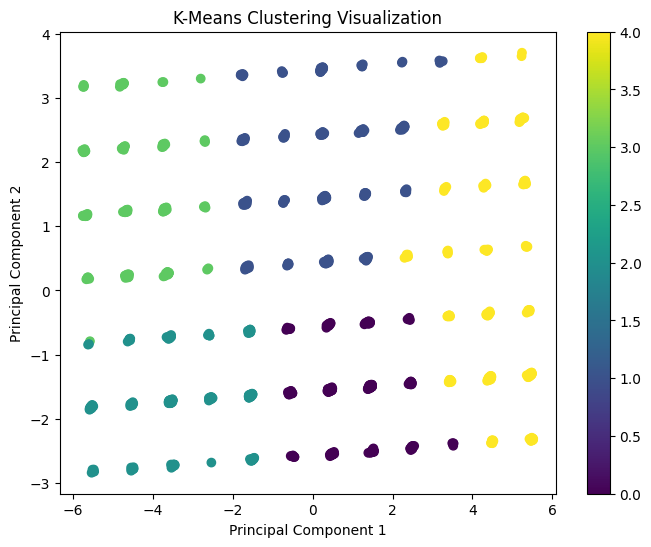

In [14]:
# Call this after scaling and predicting in Part 2
# visualize_clusters(scaled_data, labels, "K-Means Clustering Visualization")
visualize_clusters(df_processed, labels_sklearn, "K-Means Clustering Visualization")